# **PROJECT MODUL 2**

# **1. GENERAL INFORMATION**

## **1.1 Context** 
Northwind merupakan perusahaan yang bergerak pada bidang impor-ekspor makanan dan minuman berlokasi di Amerika dan tidak memproduksi barangnya sendiri, Perusahaan Northwind menjual Kembali produk dari supplier ke konsumen. Produk yang dijual perushaan Northwind berupa makanan dan minuman dengan 77 jenis produk yang berbeda, yang di kelompokan atau dikategorikan menjadi 8 kategori. Perushaan ini mengimpor dari 29 perusahaan dari berbagai negara. Dan memiliki total pelanggan sebanyak 91 perusahan di berbagai negara. Dari database tersebut saya akan berfokus kepada supplier dan mengambil insight-insight yang berhubungan dengan perusahan-perusahaan supplier.

## **1.2 Database Information**

sumber database : https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i?usp=sharing

Database Menginformasikan data tentang detail pembelian atau order, data karyawan yang menanganai pembelian tersebut, data customers dan data supplier pada perusahaan Northwind Tahun 1996 sampai 1998

Database memiliki 11 tabel yang memiliki data dan informasi :

- Region : menyimpan informasi region ID dan deskripsi Region.
- Territories : Menyimpan informasi Teritori beserta classifikasi berdasarkan Region ID.
- EmployeeTerritories : Menyimpan informasi territori ID dari setiap nomer ID karyawan.
- Employees : Menyimpan semua informasi karyawan, seperti nama, jabatan, tanggal lahir, tanggal perekrutan, dan alamat.
- Orders : Menyimpan informasi pembelian atau order seperti tanggal order, tanggal pengiriman, lokasi pengiriman, dan nomer ID perushaan pengiriman. dan terdapat informasi informasi siapa karyawan (sales) yang bertanggung jawab atas order tersebut
- Shippers : Menyimpan informasi no ID dan nama Perusahaan jasa pengiriman serta nomer telepon perusahaan
- Costumers: Menyimpan semua informasi perusahaan pelanggan serta lokasi dan nomer telepon perusahaan
- OrderDetails : Menyimpan informasi produk ID beserta jumlah dan harga satuan produk yang telah order
- Products : Menyimpan semua informasi produk seperti kuantity per unit, harga, beserta stock dan jumlah produk yang sedang dalam proses order atau pembelian. Dan informasi produk yang sudah tidak di stock
- Categories : Menyimpan informasi kategori produk dan deskripsi dari kategori produk
- Suppliers : Menyimpan semua informasi perusahaan supplier yang bekerjasama, Beserta lokasi dan nomer telepon perusahaan 

Database memiliki 2 tabel yang kosong :

- CustomerCustomerDemo
- CustomerDemographics

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

## **1.3 Hubungan Antar Tabel**

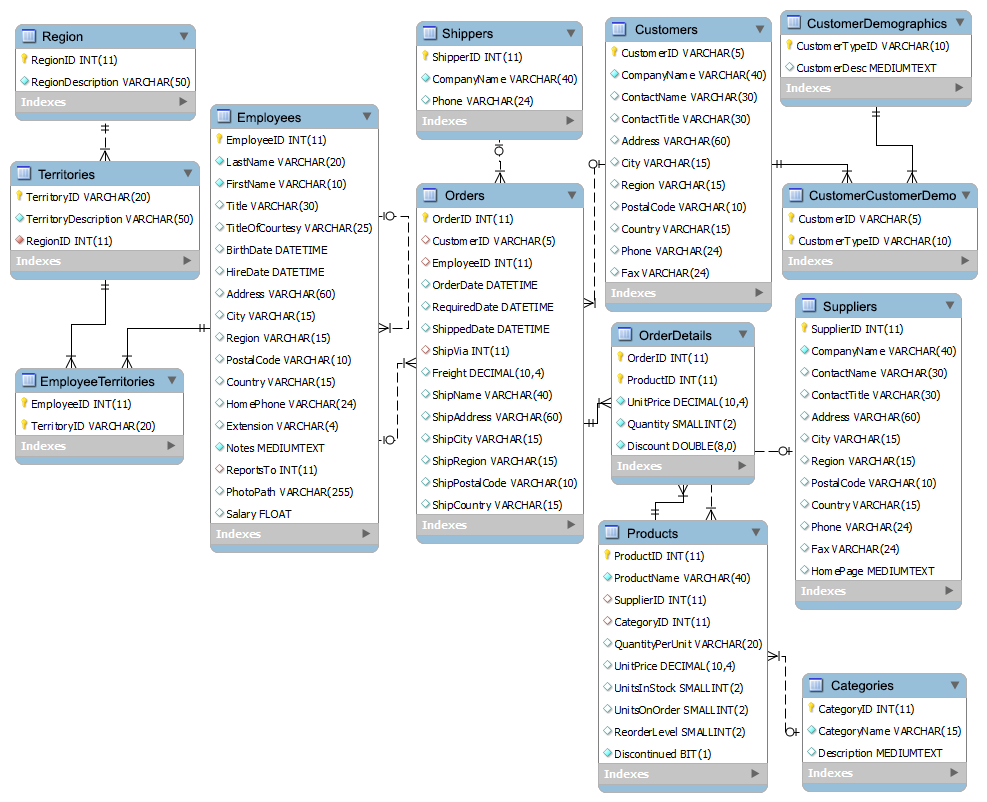

berikut ini diberikan Entity Relationship Diagram (ERD) untuk database "Northwind"

## **1.4 DATABASE**

## **1.4.Library**

In [44]:
# Connect SQL to Python
import mysql.connector as sqlcon

# Data Manipulation dan General Data
import pandas as pd
import numpy as np

# Visualisasi 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal


# **2. SQL**

## **2.1 Menghubungkan ke Database**
Proses ini diperlukan untuk menghubungkan database pada server sql ke jupyterlab, sehingga kita dapat mengexplore data melalui function pyhton

In [45]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'Northwind'
)

## **2.2 Membuat Function Quary**
Proses ini berguna agar kita dapat memanggil tabel dan data Northwind dengan menuliskan ``quary`` sql pada function, sehingga kita dapat membuat Dataframe dari database Northwind. Sehingga memudahkan dalam proses analisa data. nantinya kita tidak hanya akan menggunakan 1 tabel saja melainkan kita akan menggunakan hubungan antar tabelnya.

In [46]:
# Quary Function

mycursor = mydb.cursor()
def sql_df(yourQuary) :
    mycursor.execute(yourQuary)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

### **2.2.1 Data Order, Detail Supplier & Total Penjualan**

**Pada Analasis ini saya akan melakukan analisa yang berfokus kepada ```Supplier```**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Orders```, ```OrderDetails```, ```Product```, dan ```Suppliers```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :

- OrderID dari tabel Orders
- OrderDate dari tabel Orders
- RequiredDate dari tabel Orders
- ShippedDate dari tabel Orders
- SupplierID dari tabel Suppliers
- Supplier_CompanyName adalah CompanyName dari tabel Suppliers
- ContactName dari tabel Suppliers
- ContactTitle dari tabel Suppliers
- Address dari tabel Supplier
- City dari tabel Supplier
- Region dari tabel Supplier
- Country dari tabel Supplier
- ProductID dari tabel Products
- ProductName dari tabel Products
- Harga_Jual adalah UnitPrice dari Tabel Products yang di **definisikan sebagai harga jual perusahaan kepada customer**
- Harga_Beli adalah UnitPrice dari Tabel OrderDetails yang di **definisikan sebagai harga beli perusahaan dari supplier**
- Quantity dari tabel OrderDetails


Selain dari tabel, terdapat sebuah kolom juga yang dinamakan Total_Harga yang merupakan hasil perkalian dari Harga_Jual dengan Quantity.

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [47]:
# Quary 1

tabel1 = sql_df('''
Select  O.OrderID, O.OrderDate, O.RequiredDate, O.ShippedDate,
		S.SupplierID, S.CompanyName as Supplier_CompanyName, S.ContactName, S.ContactTitle, S.Address, S.City, S.Region, S.Country, 
        P.ProductID, P.ProductName,
		OD.UnitPrice as Harga_Beli, P.UnitPrice as Harga_Jual, OD.Quantity
From Orders O
Left Join OrderDetails OD
	On O.OrderID = OD.OrderID
Left Join Products P
	On OD.ProductID = P.ProductID
Left Join Suppliers S
	On P.SupplierID = S.SupplierID
Order by supplierID, ProductID;
                ''')
tabel1.head()

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Region,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity
0,10838,1998-01-19,1998-02-16,1998-01-23,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,4
1,10847,1998-01-22,1998-02-05,1998-02-10,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,80
2,10863,1998-02-02,1998-03-02,1998-02-17,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,20
3,10869,1998-02-04,1998-03-04,1998-02-09,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,40
4,10905,1998-02-24,1998-03-24,1998-03-06,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,20


### **2.2.2 Total Keuntungan setiap Produk**

Data kedua ini merupakan data yang menginformasikan total keuntungan atau profit setiap produk dari supplier. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Orders```, ```OrderDetails```, ```Product```, dan ```Suppliers```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :


- Supplier_CompanyName adalah CompanyName dari tabel Suppliers
- ProductName dari tabel Products
- Harga_Jual adalah UnitPrice dari Tabel Products yang di **definisikan sebagai harga jual perusahaan kepada customer**
- Harga_Beli adalah UnitPrice dari Tabel OrderDetails yang di **definisikan sebagai harga beli perusahaan dari supplier**
    - Harga beli produk tidak selalu sama, terkadang mengalami penurunan ataupun kenaikan
- Total_Quantity adalah jumlah penjual tiap produk dari tabel OrderDetails


Selain dari tabel, terdapat sebuah kolom juga yang dinamakan Profit_Each yang merupakan selisih dari Harga_Jual dengan Harga_beli. dan terdapat kolom Profit yang merukapan perkalian dari Profit_Each dengan Total_Quantity

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [48]:
# Quary 2

tabel2 = sql_df("""
Select  S.CompanyName as Supplier_CompanyName,
		P.ProductName,
		(OD.UnitPrice) as Harga_beli, P.UnitPrice as Harga_Jual, (P.UnitPrice-(OD.UnitPrice)) as Profit_Each, 
        sum(OD.Quantity) as Total_Quantity, OD.Quantity, (P.UnitPrice * OD.Quantity) as Total_Penjualan, ((P.UnitPrice-(OD.UnitPrice)) * sum(OD.Quantity)) as Profit
From Orders O
Left Join OrderDetails OD
	On O.OrderID = OD.OrderID
Left Join Products P
	On OD.ProductID = P.ProductID
Left Join Suppliers S
	On P.SupplierID = S.SupplierID
Group by Supplier_CompanyName, ProductName, Harga_beli
Order by S.supplierID, P.ProductID;
select * from suppliers;
                """)
tabel2

,Supplier_CompanyName,ProductName,Harga_beli,Harga_Jual,Profit_Each,Total_Quantity,Quantity,Total_Penjualan,Profit
0,Exotic Liquids,Chai,14.4000,18.0000,3.6000,174,45,810.0000,626.4000
1,Exotic Liquids,Chai,18.0000,18.0000,0.0000,654,35,630.0000,0.0000
2,Exotic Liquids,Chang,15.2000,19.0000,3.8000,401,50,950.0000,1523.8000
3,Exotic Liquids,Chang,19.0000,19.0000,0.0000,656,10,190.0000,0.0000
4,Exotic Liquids,Aniseed Syrup,8.0000,10.0000,2.0000,100,50,500.0000,200.0000
...,...,...,...,...,...,...,...,...,...
151,Gai pturage,Camembert Pierrot,34.0000,34.0000,0.0000,1087,70,2380.0000,0.0000
152,Forts d'rables,Sirop d'rable,28.5000,28.5000,0.0000,472,5,142.5000,0.0000
153,Forts d'rables,Sirop d'rable,22.8000,28.5000,5.7000,131,16,456.0000,746.7000
154,Forts d'rables,Tarte au sucre,39.4000,49.3000,9.9000,360,25,1232.5000,3564.0000


### **RECONNECT TO DATABASE**
Menghubungkan kembali data dengan database di lakukan untuk meminimalisir ```databaseError : 2014 (HY000): Commands out of sync; you can't run this command now```

In [49]:
# ReConnect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'Northwind'
)
# Quary Function

mycursor = mydb.cursor()
def sql_df(yourQuary) :
    mycursor.execute(yourQuary)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

### **2.2.3 2.2.3.	Transaksi yang lokasi Negara Customer dan Negara Supplier Sama**

Data ketiga ini menginformasikan bahwa terdapat Order yang memiliki lokasi negara customer dan negara supplier sama

In [50]:
# Quary 3

tabel3 = sql_df("""
Select  O.OrderID, C.CustomerID,
        S.SupplierID, S.CompanyName as Supplier_CompanyName, S.Country as Supplier_Country, S.City as Supplier_City,
        C.CompanyName as Customer_CompanyName, C.Country as Customer_Country, C.City as Customer_City, P.UnitsInStock
From Orders O
Left Join OrderDetails OD
	On O.OrderID = OD.OrderID
Left Join Products P
	On OD.ProductID = P.ProductID
Left Join Suppliers S
	On P.SupplierID = S.SupplierID
Left Join Customers C
	On O.CustomerID = C.CustomerID
WHERE S.Country = C.Country;
                """)
tabel3

,OrderID,CustomerID,SupplierID,Supplier_CompanyName,Supplier_Country,Supplier_City,Customer_CompanyName,Customer_Country,Customer_City,UnitsInStock
0,10752,NORTS,1,Exotic Liquids,UK,London,North/South,UK,London,39
1,10869,SEVES,1,Exotic Liquids,UK,London,Seven Seas Imports,UK,London,39
2,11047,EASTC,1,Exotic Liquids,UK,London,Eastern Connection,UK,London,39
3,10435,CONSH,1,Exotic Liquids,UK,London,Consolidated Holdings,UK,London,17
4,10741,AROUT,1,Exotic Liquids,UK,London,Around the Horn,UK,London,17
...,...,...,...,...,...,...,...,...,...,...
129,10339,MEREP,29,Forts d'rables,Canada,Ste-Hyacinthe,Mre Paillarde,Canada,Montral,17
130,10389,BOTTM,29,Forts d'rables,Canada,Ste-Hyacinthe,Bottom-Dollar Markets,Canada,Tsawassen,17
131,10505,MEREP,29,Forts d'rables,Canada,Ste-Hyacinthe,Mre Paillarde,Canada,Montral,17
132,10949,BOTTM,29,Forts d'rables,Canada,Ste-Hyacinthe,Bottom-Dollar Markets,Canada,Tsawassen,17


terlihat dari data di atas bahwa terdapat 134 order sekitar 6% dari total order yang memiliki kesamaan lokasi antara supplier dan costumer.

# **3. DATA MANIPULATION**

data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

In [51]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               2155 non-null   int64         
 1   OrderDate             2155 non-null   datetime64[ns]
 2   RequiredDate          2155 non-null   datetime64[ns]
 3   ShippedDate           2082 non-null   datetime64[ns]
 4   SupplierID            2155 non-null   int64         
 5   Supplier_CompanyName  2155 non-null   object        
 6   ContactName           2155 non-null   object        
 7   ContactTitle          2155 non-null   object        
 8   Address               2155 non-null   object        
 9   City                  2155 non-null   object        
 10  Region                731 non-null    object        
 11  Country               2155 non-null   object        
 12  ProductID             2155 non-null   int64         
 13  ProductName       

## **3.1 Melihat Data Sekilas Dari General Info**

Terlihat sekilas bahwa secara keseliruhan terdapat 2155 baris data dengan total 18 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada Object, integer, dan datetime.

Pertama-tama mari berfokus pada non-null values atau data yang tersedia pada setiap kolomnya.  Jika melihat informasi tersebut, terdapat 1 kolom atau feature yang memiliki data tidak lengkap yaitu pada kolom ```Region```. Feature ```Region``` kehilangan lebih dari 65% data.  
#### ___**Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**___

Kedua kita akan Berfokus pada features berikut ini: 
1. Harga_Beli
2. Harga_Jual
3. Total_Harga

Pada tipe data Harga_Jual, Harga_Beli, dan juga Total_Harga. Ketiga feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, ketiga feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan. 
#### ___**Kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**___

In [52]:
# Check Missing Value Percentage

tabel1.isna().sum()

OrderID                    0
OrderDate                  0
RequiredDate               0
ShippedDate               73
SupplierID                 0
Supplier_CompanyName       0
ContactName                0
ContactTitle               0
Address                    0
City                       0
Region                  1424
Country                    0
ProductID                  0
ProductName                0
Harga_Beli                 0
Harga_Jual                 0
Quantity                   0
dtype: int64

## **3.2 ANOMALIES**

### **3.2.1 Missing Values**

Pertama Pada fuature ```Region``` total missing value 1424 data lebih dari 65% dari total. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, lebih dari setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, maka feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Kedua pada Future ```ShippedDate``` Total missing value 73 kurang dari 5%. Untuk missing value ini kita akan melakukan drop data pada masing value (hal tersebut karena 73 dari 2155 data hanya kurang lebih 5% data, sehingga tidak akan mengurangi informasi secara signifikan)

Untuk feature atau kolom lain tidak memiliki missing value sehingga dapat digunakan untuk analisa lebih lanjut

In [53]:
# Check data missing falue pada feature ShippedDate

tabel1[tabel1['ShippedDate'].isna()]

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Region,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity
15,11070,1998-05-05,1998-06-02,NaT,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,1,Chai,18.0000,18.0000,40
78,11070,1998-05-05,1998-06-02,NaT,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,2,Chang,19.0000,19.0000,20
79,11072,1998-05-05,1998-06-02,NaT,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,2,Chang,19.0000,19.0000,8
80,11075,1998-05-06,1998-06-03,NaT,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,2,Chang,19.0000,19.0000,10
81,11077,1998-05-06,1998-06-03,NaT,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,UK,2,Chang,19.0000,19.0000,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11058,1998-04-29,1998-05-27,NaT,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,None,France,60,Camembert Pierrot,34.0000,34.0000,21
2079,11059,1998-04-29,1998-06-10,NaT,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,None,France,60,Camembert Pierrot,34.0000,34.0000,35
2081,11061,1998-04-30,1998-06-11,NaT,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,None,France,60,Camembert Pierrot,34.0000,34.0000,15
2082,11077,1998-05-06,1998-06-03,NaT,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,None,France,60,Camembert Pierrot,34.0000,34.0000,2


### **3.2.2 Handling Missing Values**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi.
Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features ```Region```. Setelah drop feature tersebut, baru di lanjitkan analisa lebih lanjut.

In [54]:
# Remove Missing Value 1

tabel1.drop(['Region'], axis=1, inplace = True)

In [55]:
# Remove Missing Value 2

tabel1.dropna(inplace = True)

In [56]:
# Recheck info

tabel1.isnull().sum()

OrderID                 0
OrderDate               0
RequiredDate            0
ShippedDate             0
SupplierID              0
Supplier_CompanyName    0
ContactName             0
ContactTitle            0
Address                 0
City                    0
Country                 0
ProductID               0
ProductName             0
Harga_Beli              0
Harga_Jual              0
Quantity                0
dtype: int64

### **3.2.3 Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```Region``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value. 

**Kesimpulan masalah missing value sudah teratasi.**

### **3.2.4 Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. ketiga features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [57]:
# Change Spesific Column To Numeric

tabel1['Harga_Jual'] = pd.to_numeric(tabel1['Harga_Jual'])
tabel1['Harga_Beli'] = pd.to_numeric(tabel1['Harga_Beli'])

In [58]:
#Rechack Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               2082 non-null   int64         
 1   OrderDate             2082 non-null   datetime64[ns]
 2   RequiredDate          2082 non-null   datetime64[ns]
 3   ShippedDate           2082 non-null   datetime64[ns]
 4   SupplierID            2082 non-null   int64         
 5   Supplier_CompanyName  2082 non-null   object        
 6   ContactName           2082 non-null   object        
 7   ContactTitle          2082 non-null   object        
 8   Address               2082 non-null   object        
 9   City                  2082 non-null   object        
 10  Country               2082 non-null   object        
 11  ProductID             2082 non-null   int64         
 12  ProductName           2082 non-null   object        
 13  Harga_Beli        

In [59]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity


### **3.2.5 Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **3.3 Membuat Feature**

### **3.3.1 Feature Profit_Each, Total_Harga, Profit**
- Profit Each = Menginformasikan keuntungan per produk tiap transaksi (Harga Jual - Harga Beli)
- Total Harga = Menginformasikan total penjualan tiap transaksi (Harga Jual x Quantity)
- Profit = Menginformasikan keuntungan tiap transaksi (Profit Each x Quantity)

In [60]:
# Add New Column (Profit_Each, Total_Harga, Profit)

tabel1['Profit_Each'] =  tabel1['Harga_Jual'] - tabel1['Harga_Beli']
tabel1['Total_Harga'] = tabel1['Harga_Jual']*tabel1['Quantity']
tabel1['Profit'] = tabel1['Profit_Each']*tabel1['Quantity']

### **3.3.2 Feature 'ProcessingDate'**

Data awal menunjukan terdapat 2 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. requiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan, sedangkat shippedDate adalah waktu dikirimkannya barang tersebut. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu pengiriman hingga dibutuhkan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara requiredDate dan juga shippedDate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [61]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['RequiredDate'] - tabel1['ShippedDate']
tabel1.sample(5)

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity,Profit_Each,Total_Harga,Profit,ProcessingDate
1459,10351,1996-11-11,1996-12-09,1996-11-20,19,New England Seafood Cannery,Robb Merchant,Wholesale Account Agent,Order Processing Dept.\r\n2100 Paul Revere Blvd.,Boston,USA,41,Jack's New England Clam Chowder,7.7,9.65,13,1.95,125.45,25.35,19 days
39,10258,1996-07-17,1996-08-14,1996-07-23,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,UK,2,Chang,15.2,19.00,50,3.80,950.00,190.00,22 days
457,10550,1997-05-28,1997-06-25,1997-06-06,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St.\r\nMoonie Ponds,Melbourne,Australia,17,Alice Mutton,39.0,39.00,8,0.00,312.00,0.00,19 days
701,10621,1997-08-05,1997-09-02,1997-08-11,9,PB Knckebrd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Gteborg,Sweden,23,Tunnbrd,9.0,9.00,10,0.00,90.00,0.00,22 days
619,10368,1996-11-29,1996-12-27,1996-12-02,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,UK,21,Sir Rodney's Scones,8.0,10.00,5,2.00,50.00,10.00,25 days


In [62]:
# Check Data Anomalies in Date Time Fomrat

tabel1['ProcessingDate'].value_counts()

21 days     227
22 days     191
23 days     165
25 days     160
19 days     159
24 days     158
26 days     145
20 days     139
18 days      98
16 days      39
7 days       37
10 days      37
27 days      35
17 days      34
5 days       31
36 days      31
8 days       30
4 days       27
9 days       24
34 days      23
35 days      23
11 days      22
6 days       21
-1 days      20
13 days      18
-7 days      16
39 days      16
-6 days      15
32 days      15
15 days      15
3 days       11
0 days       10
-4 days       8
14 days       8
-2 days       6
-5 days       6
33 days       6
1 days        6
30 days       6
37 days       5
-16 days      5
12 days       5
2 days        5
-18 days      4
-9 days       4
41 days       3
38 days       3
-8 days       2
-11 days      2
-3 days       2
28 days       2
-23 days      1
-17 days      1
Name: ProcessingDate, dtype: int64

#### Anomali Pada Processing Date**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, apakah terlihat sesuatu yang aneh? Yap benar, terdapat sebuah waktu yang menunjukan nilai minus, -56 days, dan terdapat 18 data di dalamnya. Ada apa? Sebenarnya ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. 

Untuk asumsi yang pertama, cara mengatasinya cukup dengan drop 18 data yang salah input. Dengan kata lain, kita menganggap bahwa data tersebut 'salah' dan dapat dibuang (karena jumlahnya yang tidak banyak). Untuk asumsi kedua, data ini bisa saja dipertahankan dan bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya.

Di sini, asumsi yang akan digunakan adalah asumsi yang kedua, yaitu kita akan mengasumsikan terdapat keterlambatan dalam pengiriman. Nantinya, kita akan coba melakukan analisis untuk data ini.

In [63]:
# Handling Date Time Format Anomalies (Check Data First)

tabel1[tabel1['ProcessingDate'] < '0 days']

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity,Profit_Each,Total_Harga,Profit,ProcessingDate
1,10847,1998-01-22,1998-02-05,1998-02-10,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,UK,1,Chai,18.0,18.00,80,0.00,1440.0,0.0,-5 days
40,10264,1996-07-24,1996-08-21,1996-08-23,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,UK,2,Chang,15.2,19.00,35,3.80,665.0,133.0,-2 days
94,10309,1996-09-19,1996-10-17,1996-10-23,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,USA,4,Chef Anton's Cajun Seasoning,17.6,22.00,20,4.40,440.0,88.0,-6 days
108,10726,1997-11-03,1997-11-17,1997-12-05,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,USA,4,Chef Anton's Cajun Seasoning,22.0,22.00,25,0.00,550.0,0.0,-18 days
134,10451,1997-02-19,1997-03-05,1997-03-12,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,USA,65,Louisiana Fiery Hot Pepper Sauce,16.8,21.05,28,4.25,589.4,119.0,-7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,10515,1997-04-23,1997-05-07,1997-05-23,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,France,60,Camembert Pierrot,34.0,34.00,84,0.00,2856.0,0.0,-16 days
2060,10709,1997-10-17,1997-11-14,1997-11-20,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,France,60,Camembert Pierrot,34.0,34.00,10,0.00,340.0,0.0,-6 days
2067,10847,1998-01-22,1998-02-05,1998-02-10,28,Gai pturage,Eliane Noz,Sales Representative,"Bat. B\r\n3, rue des Alpes",Annecy,France,60,Camembert Pierrot,34.0,34.00,45,0.00,1530.0,0.0,-5 days
2137,10779,1997-12-16,1998-01-13,1998-01-14,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.3,49.30,20,0.00,986.0,0.0,-1 days


## **3.4 Check Cleaned Data**

### **3.4.1 Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [64]:
# Clean Data

tabel1.sample(20)

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity,Profit_Each,Total_Harga,Profit,ProcessingDate
1256,10573,1997-06-19,1997-07-17,1997-06-20,16,Bigfoot Breweries,Cheryl Saylor,Regional Account Rep.,3400 - 8th Avenue\r\nSuite 210,Bend,USA,34,Sasquatch Ale,14.00,14.00,40,0.00,560.00,0.0,27 days
1391,10455,1997-02-24,1997-04-07,1997-03-03,18,Aux joyeux ecclsiastiques,Guylne Nodier,Sales Manager,"203, Rue des Francs-Bourgeois",Paris,France,39,Chartreuse verte,14.40,18.00,20,3.60,360.00,72.0,35 days
629,10513,1997-04-22,1997-06-03,1997-04-28,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,UK,21,Sir Rodney's Scones,10.00,10.00,40,0.00,400.00,0.0,36 days
1485,10890,1998-02-16,1998-03-16,1998-02-18,19,New England Seafood Cannery,Robb Merchant,Wholesale Account Agent,Order Processing Dept.\r\n2100 Paul Revere Blvd.,Boston,USA,41,Jack's New England Clam Chowder,9.65,9.65,14,0.00,135.10,0.0,26 days
1737,10335,1996-10-22,1996-11-19,1996-10-24,24,"G'day, Mate",Wendy Mackenzie,Sales Representative,170 Prince Edward Parade\r\nHunter's Hill,Sydney,Australia,51,Manjimup Dried Apples,42.40,53.00,48,10.60,2544.00,508.8,26 days
1847,10794,1997-12-24,1998-01-21,1998-01-02,25,Ma Maison,Jean-Guy Lauzon,Marketing Manager,2960 Rue St. Laurent,Montral,Canada,54,Tourtire,7.45,7.45,6,0.00,44.70,0.0,19 days
809,10723,1997-10-30,1997-11-27,1997-11-25,11,Heli Swaren GmbH & Co. KG,Petra Winkler,Sales Manager,Tiergartenstrae 5,Berlin,Germany,26,Gumbr Gummibrchen,31.23,31.23,15,0.00,468.45,0.0,2 days
49,10469,1997-03-10,1997-04-07,1997-03-14,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,UK,2,Chang,15.20,19.00,40,3.80,760.00,152.0,24 days
2120,10449,1997-02-18,1997-03-18,1997-02-27,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,39.40,49.30,35,9.90,1725.50,346.5,19 days
1706,10749,1997-11-20,1997-12-18,1997-12-19,23,Karkki Oy,Anne Heikkonen,Product Manager,Valtakatu 12,Lappeenranta,Finland,76,Lakkalikri,18.00,18.00,10,0.00,180.00,0.0,-1 days


### **3.4.2 General Info Cleaned Data**

In [65]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), (tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,OrderID,int64,2082,0,0.0,809,"[10289, 10747]"
1,OrderDate,datetime64[ns],2082,0,0.0,478,"[1997-10-21T00:00:00.000000000, 1998-01-16T00:..."
2,RequiredDate,datetime64[ns],2082,0,0.0,450,"[1997-12-03T00:00:00.000000000, 1998-01-09T00:..."
3,ShippedDate,datetime64[ns],2082,0,0.0,387,"[1997-03-03T00:00:00.000000000, 1997-10-13T00:..."
4,SupplierID,int64,2082,0,0.0,29,"[22, 1]"
5,Supplier_CompanyName,object,2082,0,0.0,29,"[Mayumi's, Specialty Biscuits, Ltd.]"
6,ContactName,object,2082,0,0.0,29,"[Petra Winkler, Mayumi Ohno]"
7,ContactTitle,object,2082,0,0.0,15,"[Sales Representative, International Marketing..."
8,Address,object,2082,0,0.0,29,"[2960 Rue St. Laurent, Brovallavgen 231]"
9,City,object,2082,0,0.0,29,"[Sandvika, Manchester]"


In [66]:
tabel1_sum = tabel1[['Supplier_CompanyName', 'Quantity', 'Total_Harga']].groupby('Supplier_CompanyName').sum()
tabel1_sum.rename({'Total_Harga':'Total_Penjulan', 'old_col2':'new_col2'}, inplace = True)
tabel1_sum

,Quantity,Total_Harga
Supplier_CompanyName,,
Aux joyeux ecclsiastiques,1414,178398.50
Bigfoot Breweries,1439,23582.00
Cooperativa de Quesos 'Las Cabras',1038,27612.00
Escargots Nouveaux,534,7075.50
Exotic Liquids,2107,36329.00
Formaggi Fortini s.r.l.,2479,54733.30
Forts d'rables,1682,70463.40
"G'day, Mate",2072,72525.60
Gai pturage,3000,133416.00


## **3.5 Data Outlier**
Outlier adalah data yang menginformasikan suatu data yang jauh berbeda dibandingkan terhadap keseluruhan data. Tidak setiap outlier itu buruk dan harus di hapus atau di hilangkan. Dalam kasus ini outlier menunjukan penjualan suatu produk yang memiliki nilai atau value yang tinggi dan data ini bagus untuk perusahaan
**Kesimpulan data Outlier akan tetap di gunakan untuk analisa**

In [67]:
# Outlier Check With Function

Q1_amount = tabel1['Total_Harga'].describe()['25%']
Q3_amount = tabel1['Total_Harga'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['Total_Harga'] < Q1_amount - (1.5 * iqr)) | (tabel1['Total_Harga']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['Total_Harga'] > Q1_amount - (1.5 * iqr)) & (tabel1['Total_Harga']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,OrderID,OrderDate,RequiredDate,ShippedDate,SupplierID,Supplier_CompanyName,ContactName,ContactTitle,Address,City,Country,ProductID,ProductName,Harga_Beli,Harga_Jual,Quantity,Profit_Each,Total_Harga,Profit,ProcessingDate
75,11030,1998-04-17,1998-05-15,1998-04-27,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,UK,2,Chang,19.00,19.00,100,0.0,1900.0,0.0,18 days
148,10765,1997-12-04,1998-01-01,1997-12-09,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,USA,65,Louisiana Fiery Hot Pepper Sauce,21.05,21.05,80,0.0,1684.0,0.0,23 days
166,10618,1997-08-01,1997-09-12,1997-08-08,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,USA,6,Grandma's Boysenberry Spread,25.00,25.00,70,0.0,1750.0,0.0,35 days
185,10987,1998-03-31,1998-04-28,1998-04-06,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,USA,7,Uncle Bob's Organic Dried Pears,30.00,30.00,60,0.0,1800.0,0.0,22 days
186,10988,1998-03-31,1998-04-28,1998-04-10,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,USA,7,Uncle Bob's Organic Dried Pears,30.00,30.00,60,0.0,1800.0,0.0,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,10691,1997-10-03,1997-11-14,1997-10-22,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.30,49.30,48,0.0,2366.4,0.0,23 days
2143,10852,1998-01-26,1998-02-09,1998-01-30,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.30,49.30,50,0.0,2465.0,0.0,10 days
2147,10904,1998-02-24,1998-03-24,1998-02-27,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.30,49.30,35,0.0,1725.5,0.0,25 days
2150,10949,1998-03-13,1998-04-10,1998-03-17,29,Forts d'rables,Chantal Goulet,Accounting Manager,148 rue Chasseur,Ste-Hyacinthe,Canada,62,Tarte au sucre,49.30,49.30,60,0.0,2958.0,0.0,24 days


C:\Users\Dwi Pamuji\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



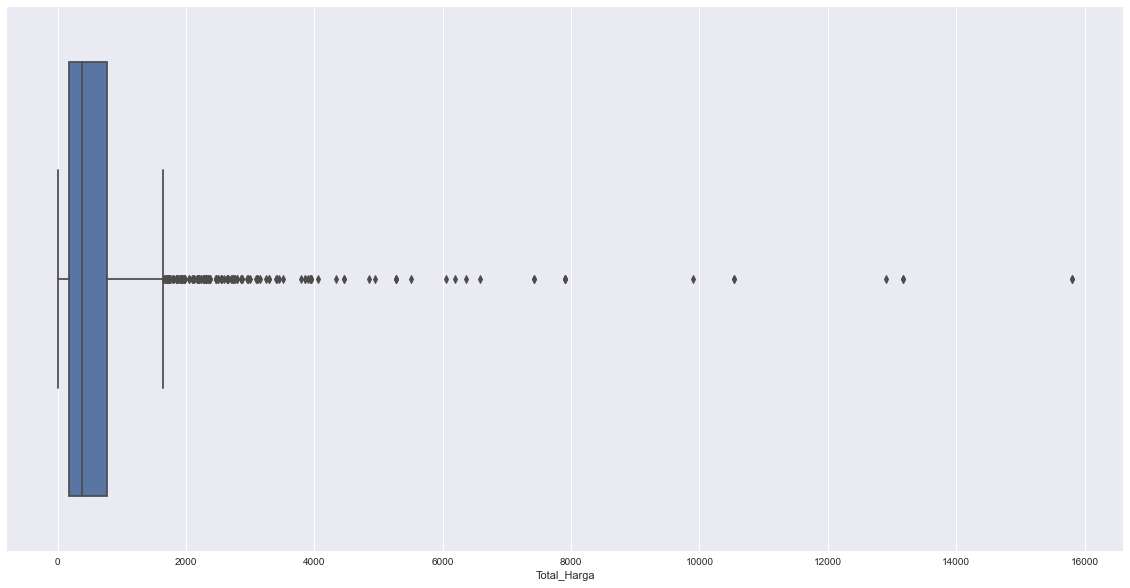

In [68]:
# Memvisualkan Outlier

plt.figure(figsize = (20,10))
sns.boxplot(tabel1['Total_Harga'])
plt.show()

# **Menghitung total produk yang terjual dan total penjualan tiap supplier**

# **4. DATA VISUALIZATION DAN STATISTIK**

## **4.1 Data Visualization**

Setelah memiliki data yang sudah 'bersih' kita dapat melakukan analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data yang berfokus pada **Supplier** untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan untuk pengambilan keputusan dan menyusun strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang sekecil-kecilnya

### **4.1.1 Total Penjualan per Tahun**

In [69]:
# Tabel Penjualan perTahun

penjualan_tahunan = tabel1[['ShippedDate', 'Quantity' ,'Total_Harga']].groupby(pd.DatetimeIndex(tabel1['ShippedDate']).year).sum()
penjualan_tahunan

,Quantity,Total_Harga
ShippedDate,,
1996,8717,262798.43
1997,25460,691261.40
1998,15942,467863.72


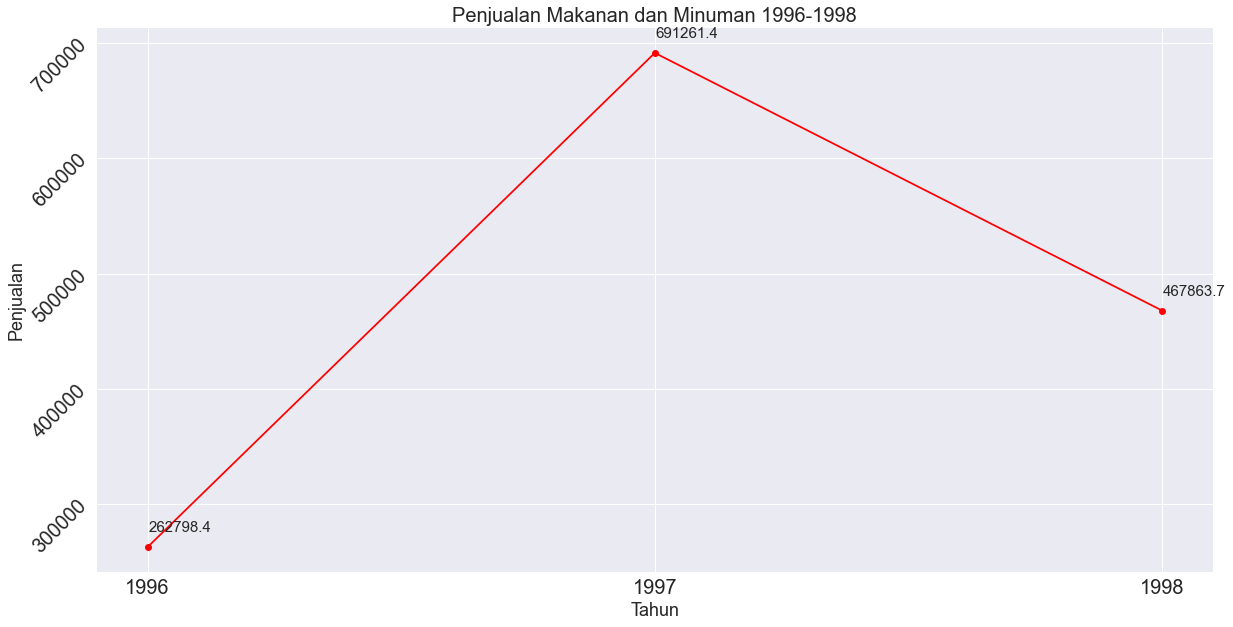

In [70]:
# Line Plot Penjualan tahun ke tahun

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(penjualan_tahunan.index, penjualan_tahunan['Total_Harga'], 'ro-')
plt.title('Penjualan Makanan dan Minuman 1996-1998', size = 20)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Penjualan', size = 18)
plt.xticks(penjualan_tahunan.index, size = 20)
plt.yticks(rotation = 45, size = 20)

for x,y in zip(penjualan_tahunan.index, round(penjualan_tahunan['Total_Harga'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15), size=15)

plt.show()

dari linechart diatas dapat di lihat bahwa penjualan terbesar berada pada tahun 1997, Setelah mengetahui total penjualan kita akan menganalisa beberapa data yang berfokus kepada perusahaan supplier

### **4.1.2 Top 5 Supplier Berdasarkan Penjualan**

In [71]:
# Membuat Tabel Top 5 Supplier

tabel_penjualan = tabel1[['Supplier_CompanyName', 'Total_Harga']].groupby('Supplier_CompanyName').sum().sort_values('Total_Harga', ascending = False)
tabel_penjualan.rename(columns = ({'Total_Harga':'Total_Penjualan'}), inplace = True)
tabel_penjualan.reset_index(inplace=True)

In [72]:
supplier_top_5 = tabel_penjualan.head()

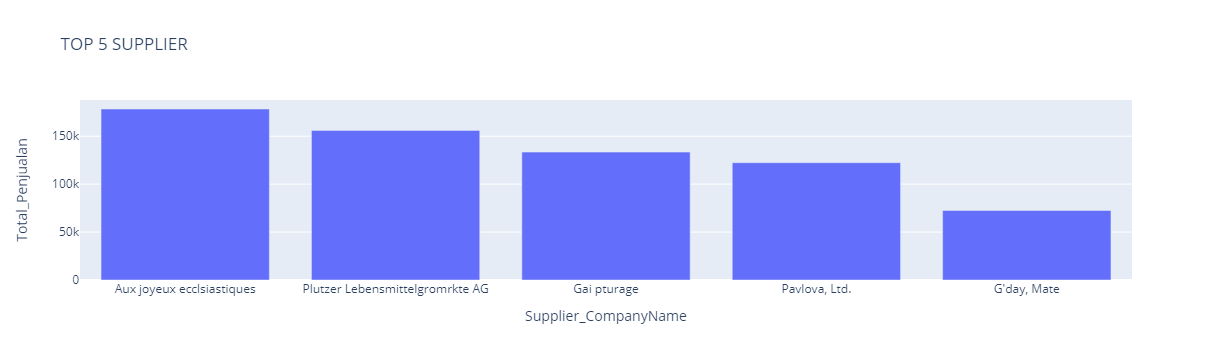

In [73]:
# Membuat Grafik Top 5 Supplier

fig = px.bar(supplier_top_5, x='Supplier_CompanyName', y='Total_Penjualan',
            title = 'TOP 5 SUPPLIER')
fig.show()

Bisnis import-eksport makanan dan minuman tak terlepas dari perusahaan supplier, peranan supplier akan sangat penting untuk menyediakan produk yang laku di pasaran dan dapat menaikan profit dari perusahaan. Mari sedikit melihat data yang ada. Dari total sekitar 2000an transaksi yang terjadi pada tahun 1996 hingga 1998. Supplier yang memiliki nilai penjualan terbesar adalah perusahaan Aux joyeux ecclsiastiques, Plutzer Lebensmitteigromrkte AG, Gai pturage, pavlova Ltd, G'day. mate. 4 dari perusahaan diatas memiliki penjualan di atas 100,000 dollar.

Melihat adanya sektor di mana terdapat supplier yang memiliki hasil penjualan yang tinggi dan menghasilkan penjualan yang besar untuk perusahaan. Dengan data diatas kita dapat mentreatment perusahaan - perusahaan supplier dengan lebih baik. Seperti memberi bonus kepada perusahaan supplier, dan kerja sama yang lebih besar lagi. Penawaran ini dilakukan agar perusahaan supplier tidak berpindah ke lain hati dan terjalin kerja sama yang lebih erat.

### **4.1.3 Worst 5 Supplier Berdasarkan Penjualan**

In [74]:
# Membuat Tabel Worst 5 Supplier

supplier_worst_5 = tabel_penjualan.tail()
supplier_worst_5

,Supplier_CompanyName,Total_Penjualan
24,PB Knckebrd AB,12510.0
25,Lyngbysild,10970.0
26,Escargots Nouveaux,7075.5
27,Zaanse Snoepfabriek,6367.0
28,Refrescos Americanas LTDA,4927.5


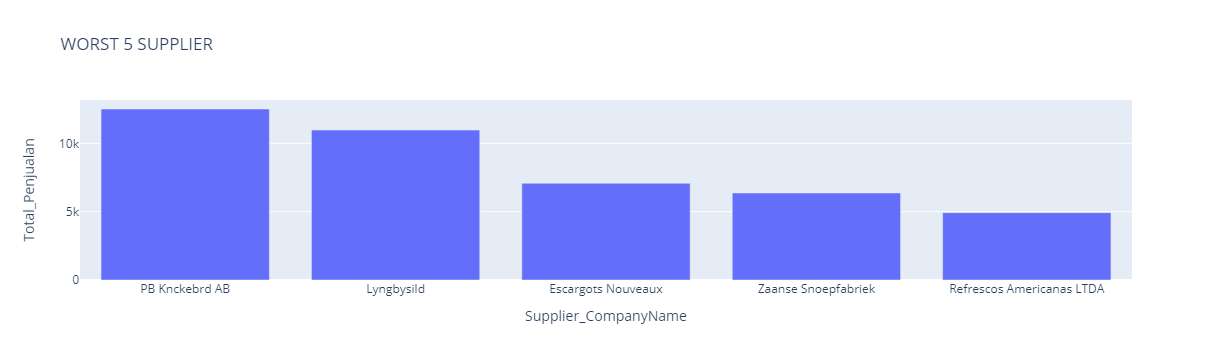

In [75]:
# Membuat Grafik Worst 5 Supplier

fig = px.bar(supplier_worst_5, x='Supplier_CompanyName', y='Total_Penjualan',
            title = 'WORST 5 SUPPLIER')
fig.show()

Bisnis import-eksport makanan dan minuman tak terlepas dari perusahaan supplier, peranan supplier akan sangat penting untuk menyediakan produk yang laku di pasaran dan dapat menaikan profit dari perusahaan. Mari sedikit melihat data yang ada. Dari total sekitar 2000an transaksi yang terjadi pada tahun 1996 hingga 1998. Supplier yang memiliki nilai penjualan yang relatif kecil adalah perusahaan PB Knckebrd AB, Lyngbysild, Escargots Nouveaux, Zaanse Snoepfabriek, Refrescos Americanas LTDA.

Melihat adanya sektor di mana terdapat supplier yang memiliki hasil penjualan yang relatif kecil. Dengan data diatas kita dapat mentreatment perusahaan - perusahaan supplier dengan lebih baik. Seperti memberi pendekatan kepada perusahaan supplier agar supplier dapat menaikan penjualannya.

### **4.1.4 10 Product Terlaris**

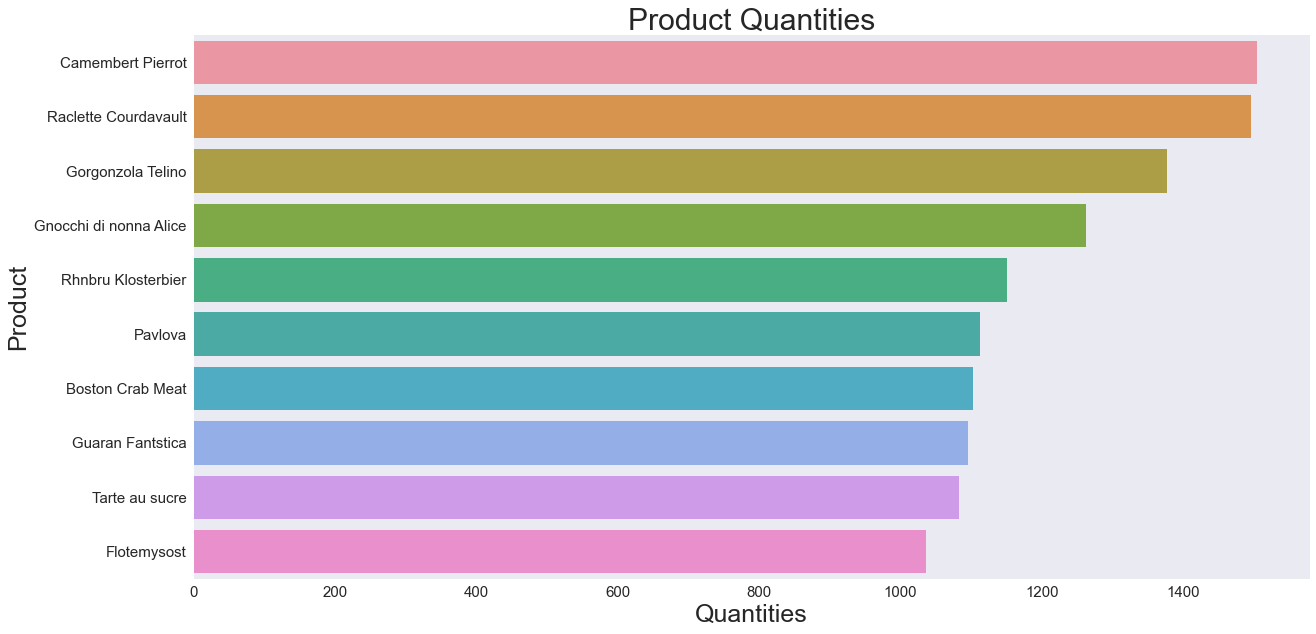

In [76]:
# Membuat Grafik 10 product terlaris

product_best_10 = tabel1[['ProductName', 'Quantity']].groupby('ProductName').sum().sort_values('Quantity', ascending=False).head(10)
plt.figure(figsize = (20,10))
sns.barplot(x = product_best_10['Quantity'], y=product_best_10.index)
plt.grid(axis = 'x')
plt.title('Product Quantities', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Dengan data diatas kita dapat melihat 10 produk terlaris di pasaran. Setelah mengetahui 10 produk terlaris selanjutnya kita akan mencari top supplier dengan product terlaris untuk melihat supplier mana yang memiliki product terlaris

### **4.1.5 Top 3 Supplier berdasarkan Product Terlaris**

In [77]:
# Membuat Tabel 3 Supplier dengan product terlaris

tabel1[['Supplier_CompanyName', 'Quantity']].groupby('Supplier_CompanyName').sum().sort_values('Quantity', ascending=False).head(3)

,Quantity
Supplier_CompanyName,
"Pavlova, Ltd.",3867
Plutzer Lebensmittelgromrkte AG,3808
Gai pturage,3000


In [78]:
pavlova_product = tabel1[tabel1['Supplier_CompanyName'] == 'Pavlova, Ltd.'][['ProductName', 'Quantity']].groupby(by='ProductName').sum().sort_values(by='Quantity', ascending=False)
plutzer_product = tabel1[tabel1['Supplier_CompanyName'] == 'Plutzer Lebensmittelgromrkte AG'][['ProductName', 'Quantity']].groupby(by='ProductName').sum().sort_values(by='Quantity', ascending=False)
gai_product = tabel1[tabel1['Supplier_CompanyName'] == 'Gai pturage'][['ProductName', 'Quantity']].groupby(by='ProductName').sum()
display(pavlova_product, plutzer_product, gai_product)

,Quantity
ProductName,
Pavlova,1112
Alice Mutton,966
Outback Lager,805
Carnarvon Tigers,539
Vegie-spread,445


,Quantity
ProductName,
Rhnbru Klosterbier,1151
Original Frankfurter grne Soe,761
Thringer Rostbratwurst,746
Wimmers gute Semmelkndel,608
Rssle Sauerkraut,542


,Quantity
ProductName,
Camembert Pierrot,1504
Raclette Courdavault,1496


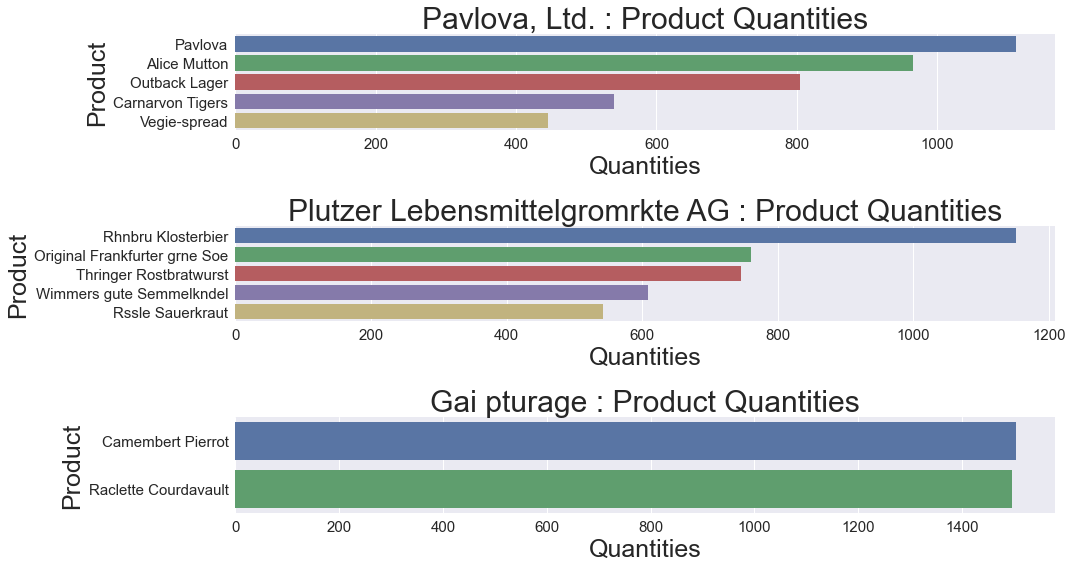

In [79]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
sns.barplot(x=pavlova_product['Quantity'],y=pavlova_product.index)
plt.title('Pavlova, Ltd. : Product Quantities', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)


plt.subplot(3,1,2)
sns.barplot(x=plutzer_product['Quantity'],y=plutzer_product.index)
plt.title('Plutzer Lebensmittelgromrkte AG : Product Quantities', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)

plt.subplot(3,1,3)
sns.barplot(x=gai_product['Quantity'],y=gai_product.index)
plt.title('Gai pturage : Product Quantities', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.tight_layout(h_pad = 2)

Terlihat top 3 supplier dengan product terlaris adalah perusahaan Pavlova Ltd., Plutzer Lebensmittelgromrkte AG, dan Gai pturage. Dapat dilihat dari ketiga perusahaan tersebut perusahaan yang paling efisien adalah Gai pturage, karna kedua produknya adalah produk terlaris. perusahaan ```Gai pturage``` memproduksi ```camembert Pierrot``` yang menempati posisi pertama product terlaris dengan penjualan sebanyak 1504 pcs, dan ```Racietta Courdavault``` menempati posisi kedua produk terlaris sebanyak 1496 pcs.

Sedangkan 2 supplier lain hanya memiliki masing-masing 1 produk yang masuk kedalam 10 produk terlaris. yaitu pruduct ```pavlova``` yang di produksi oleh perusahaan ```Pavlova, Ltd.``` yang menduduki posisi 6 produk terlaris dengan penjualan sebanyak 1112 pcs. dan ```Rhnbru Klosterbier``` yang di produksi oleh perusahaan ```Plutzer Lebensmittelgromrkte AG``` yang menduduki posisi 5 produk terlaris dengan penjualan sebanyak 1151 pcs.

Melihat keadaan tersebut, kita dapat melakukan riset lebih lanjut apakah produk ```pavlova``` dan ```Plutzer Lebensmittelgromrkte AG``` memiliki demand yang melebihi jumlah produksi. Bila memang demand melibihi jumlah produksi kita dapat meminta pihak perusahaan ```Pavlova, Ltd.``` dapat menjadikan produk  ```pavlova``` menjadi produksi yang diprioritaskan dan ```Plutzer Lebensmittelgromrkte AG``` dapat menjadikan produk ```Rhnbru Klosterbier``` menjadi produksi yang diprioritaskan.

### **4.1.6 Top Supplier berdasarkan profit yang dihasilkan dari penjualan produknya**

Pada analisa ini kita akan menggukanan tabel2 dari Quary 2 untuk melihat perusahaan supplier mana yang menghasilkan profit untuk perusahaan

In [80]:
supplier_profit = tabel2[['Supplier_CompanyName', 'Profit']].groupby(by='Supplier_CompanyName').sum().sort_values(by='Profit', ascending=False)
supplier_profit

,Profit
Supplier_CompanyName,
Aux joyeux ecclsiastiques,15299.5000
Plutzer Lebensmittelgromrkte AG,9424.0400
Gai pturage,9316.0000
"Pavlova, Ltd.",8441.0500
"G'day, Mate",4503.0000
Forts d'rables,4310.7000
Formaggi Fortini s.r.l.,3932.8000
Pasta Buttini s.r.l.,3528.0000
Norske Meierier,3419.8000


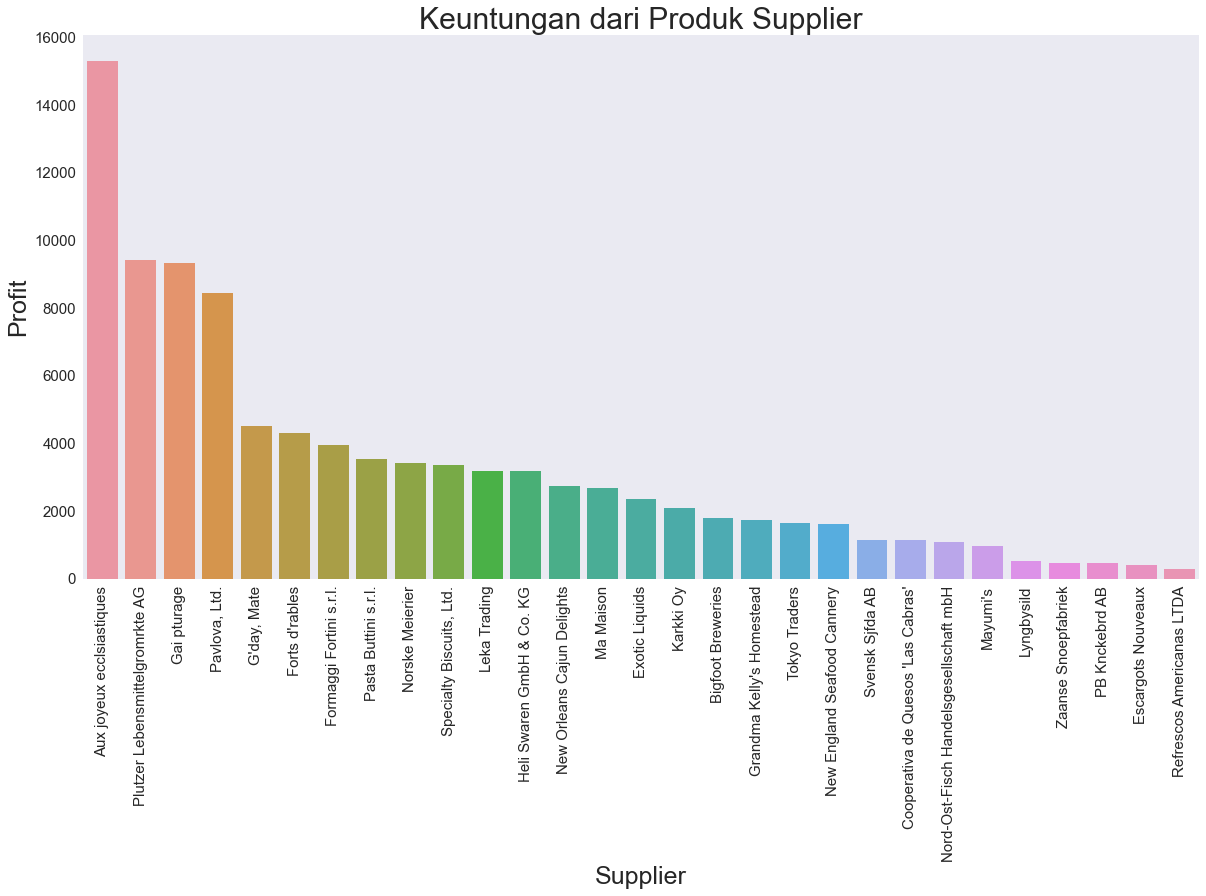

In [81]:
plt.figure(figsize = (20,10))
sns.barplot(y=supplier_profit['Profit'], x=supplier_profit.index)
plt.grid(axis = 'y')
plt.title('Keuntungan dari Produk Supplier', size = 30)
plt.xticks(size = 15, rotation = '90')
plt.yticks(size = 15)
plt.ylabel('Profit', size = 25)
plt.xlabel('Supplier', size = 25)
plt.show()

Dari data tersebut dapat terlihat jelas bahwa perusahaan supplier ```Aux joyeux ecclsiastiques``` menghasilkan profit terbesar pertama di antara supplier lain sebesar 15299.5 dollar. bahkan hampir mencapai 2x lipat dari supplier nomer 2 yaitu ```Plutzer Lebensmittelgromrkte AG```. dan perusahaan supplier yang menghasilkan profit terkecil adalah ```Refrescos Americanas LTDA``` yaitu sebesar 279.9 dollar.

dengan data tersebut kita dapat membuat keputusan yang tegas kepada perusahaan supplier yang memiliki profit yang relatif kecil dan dapat berfokus kepada perushaan yang menghasilkan profit yang relatif besar agar dapat menaikan keuntungan perusahaan

## **4.2 STATISTIC**

### **4.2.1 Perbedaan Punjualan Produk(```Total_Harga```) Tiap Supplier**

Karna feature ```Total_Harga``` diketahui tidak berdistribusi normal dari Processing Data, tetapi kita akan tetap menguji distribusinya menggunakan metode shapiro

Maka, kita akan menguji median dari gaji, karena mean sensitif terhadap outlier.

In [82]:
norm_total_harga, pval_total_harga = shapiro(tabel1['Total_Harga'])

if pval_total_harga < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval_total_harga} < 5%)')
    print ('DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval_total_harga} > 5%)')
    print ('DATA PENJUALAN BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL


In [83]:
# Uji Perbandingan Nilai Penjualan (Total_Harga) Antar Setiap Supllier (Kruskal Wallis)

kw, p_value_kw = kruskal(
    tabel1[tabel1['Supplier_CompanyName'] == 'Aux joyeux ecclsiastiques']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Bigfoot Breweries']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == "Cooperativa de Quesos 'Las Cabras'"]['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Escargots Nouveaux']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Exotic Liquids']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Formaggi Fortini s.r.l.']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == "Forts d'rables"]['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == "G'day, Mate"]['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Gai pturage']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == "Grandma Kelly's Homestead"]['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Heli Swaren GmbH & Co. KG']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Karkki Oy']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Leka Trading']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Lyngbysild']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Ma Maison']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == "Mayumi's"]['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'New England Seafood Cannery']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'New Orleans Cajun Delights']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Nord-Ost-Fisch Handelsgesellschaft mbH']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Norske Meierier']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'PB Knckebrd AB']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Pasta Buttini s.r.l.']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Pavlova, Ltd.']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Plutzer Lebensmittelgromrkte AG']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Refrescos Americanas LTDA']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Specialty Biscuits, Ltd.']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Svensk Sjfda AB']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Tokyo Traders']['Total_Harga'],
    tabel1[tabel1['Supplier_CompanyName'] == 'Zaanse Snoepfabriek']['Total_Harga'])

if p_value_kw < 0.05 :
    print (f'Tolak H0 Karena P-Value ({p_value_kw} < 0.05)')
    print ('Terdapat Perbedaan Nilai Median Total Penjualan pada Setiap Supplier')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({p_value_kw} > 0.05)')
    print ('Tidak Terdapat Perbedaan Nilai Median Total Penjualan pada Setiap Supplier')

Tolak H0 Karena P-Value (3.5987357936246638e-65 < 0.05)
Terdapat Perbedaan Nilai Median Total Penjualan pada Setiap Supplier


### **4.2.2 Distribusi Feature**

untuk menaikan keuntungan perusahan sebasar-besarnya kita harus menaikan feature yang berhubungan kuat dengan ```Profit``` 
kita akan mencari feature mana yang miliki korelasi yang paling besar dengan profit supplier

In [84]:
x1 = tabel1[['Supplier_CompanyName', 'Quantity', 'Total_Harga', 'Profit', ]].groupby('Supplier_CompanyName').sum()

In [85]:
x2 = tabel1[['Supplier_CompanyName', 'ProductName']].groupby('Supplier_CompanyName').count()

In [86]:
supplier_kor = x2.join(x1, how='outer')
supplier_kor.rename(columns = {'ProductName':'Total_Produk', 'Quantity':'Total_Quantity', 'Total_Harga':'Total_Penjualan'}, inplace=True)
supplier_kor.sample(5)

,Total_Produk,Total_Quantity,Total_Penjualan,Profit
Supplier_CompanyName,,,,
Ma Maison,67,1636,27099.75,2663.75
PB Knckebrd AB,33,926,12510.00,455.40
Heli Swaren GmbH & Co. KG,59,1436,43991.69,3173.69
Nord-Ost-Fisch Handelsgesellschaft mbH,31,608,15741.12,1069.14
Norske Meierier,102,2480,49803.00,3419.80


In [87]:
supplier_kor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Aux joyeux ecclsiastiques to Zaanse Snoepfabriek
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total_Produk     29 non-null     int64  
 1   Total_Quantity   29 non-null     int64  
 2   Total_Penjualan  29 non-null     float64
 3   Profit           29 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.2+ KB


In [88]:
# Uji Perbandingan Nilai profitEach Antar Setiap Product Line (Normalitas)

norm_produk, pval_produk = shapiro(supplier_kor['Total_Produk'])
norm_quantity, pval_quantity = shapiro(supplier_kor['Total_Quantity'])
norm_penjualan, pval_penjualan = shapiro(supplier_kor['Total_Penjualan'])
norm_profit, pval_profit = shapiro(supplier_kor['Profit'])

print ('DATA TOTAL PRODUK')
if pval_penjualan < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval_produk} < 5%)')
    print ('DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval_produk} > 5%)')
    print ('DATA PENJUALAN BERDISTRIBUS NORMAL')
    
print ('\nDATA TOTAL QUANTITY')
if pval_penjualan < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval_quantity} < 5%)')
    print ('DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval_quantity} > 5%)')
    print ('DATA PENJUALAN BERDISTRIBUS NORMAL')
    
print ('\nDATA TOTAL PENJUALAN')
if pval_penjualan < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval_penjualan} < 5%)')
    print ('DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval_penjualan} > 5%)')
    print ('DATA PENJUALAN BERDISTRIBUS NORMAL')

print ('\nDATA PROFIT')
if norm_profit < 0.05 :
    print (f'Tolak H0 Karena P-Value ({norm_profit} < 5%)')
    print ('DATA PROFIT TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({norm_profit} > 5%)')
    print ('DATA PROFIT BERDISTRIBUS NORMAL')

DATA TOTAL PRODUK
Tolak H0 Karena P-Value (0.02576380781829357 < 5%)
DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL

DATA TOTAL QUANTITY
Tolak H0 Karena P-Value (0.025382932275533676 < 5%)
DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL

DATA TOTAL PENJUALAN
Tolak H0 Karena P-Value (7.248014298966154e-05 < 5%)
DATA PENJUALAN TIDAK BERDISTRIBUS NORMAL

DATA PROFIT
Gagal Tolak H0 Karena P-Value (0.7543554902076721 > 5%)
DATA PROFIT BERDISTRIBUS NORMAL


### **4.2.3 Korelasi antar feature**

di ketahui dari 4 feature 
terdapat 3 feature yang tidak berdistribusi normal yaitu ```Total_Produk```, ```Total_Quantity```, dan ```Total_Penjualan```
hanya feature ```Profit``` yang berdistribusi normal

dari data tersebut kita dapat mengambil kesimpulan untuk menggunakan metode correlasi non parametrik yaitu Correlasi **Spearman**

In [89]:
# Hubungan antar kolom

supplier_kor[['Total_Produk', 'Total_Quantity', 'Total_Penjualan', 'Profit']].corr('spearman')

,Total_Produk,Total_Quantity,Total_Penjualan,Profit
Total_Produk,1.000000,0.980774,0.770274,0.797387
Total_Quantity,0.980774,1.000000,0.794581,0.818719
Total_Penjualan,0.770274,0.794581,1.000000,0.966995
Profit,0.797387,0.818719,0.966995,1.000000


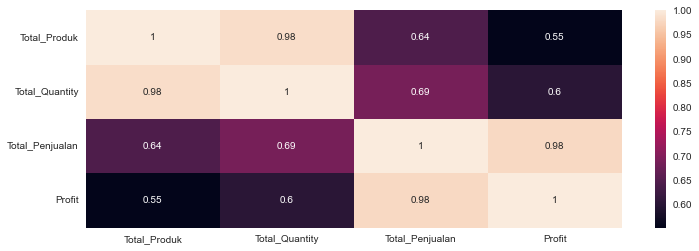

In [90]:
plt.figure(figsize = (12,4))
sns.heatmap(supplier_kor[['Total_Produk', 'Total_Quantity','Total_Penjualan', 'Profit']].corr(), annot=True)
plt.show()

Dari tabel heatmap di atas kita mendapat kesimpulan bahwa feature yang memiliki nilai korelasi terbesar dengan feature ```Profit``` adalah feature ```Total_Penjualan```

C:\Users\Dwi Pamuji\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



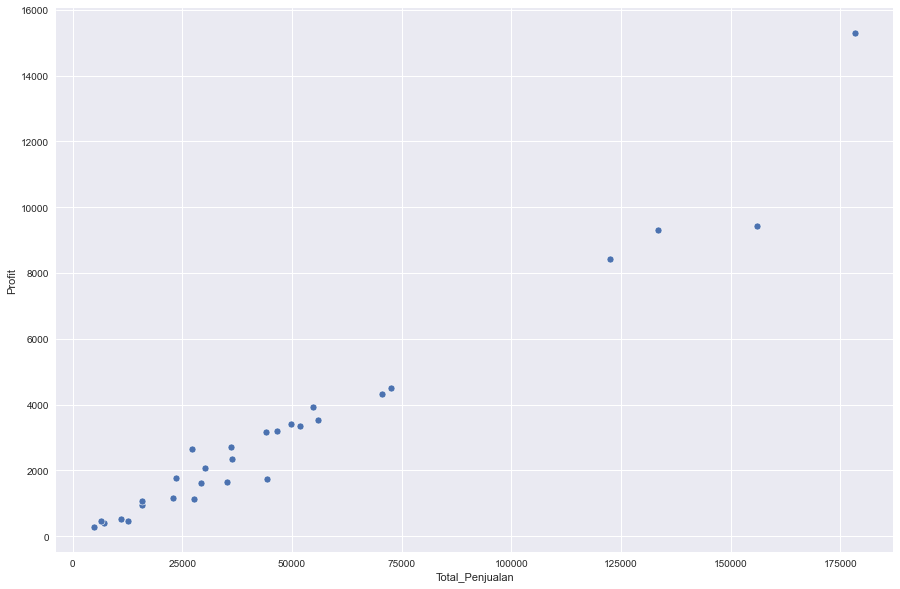

In [91]:
plt.figure(figsize=(15,10))
sns.scatterplot(supplier_kor['Total_Penjualan'], supplier_kor['Profit'])
plt.show()

scatterplot di atas menginfomasikan bahwa **Total Penjualan Produk Supplier** memiliki hubungan yang kuat dengan **Profit Produk Supplier** yang di hasilkan oleh masing masing supplier

insight :
Untuk menaikan **Profit Supplier** yang di hasilkan perusahaan kita perlu meningkatkan **Total_Penjualan** tiap Supplier

Dari grafik heatmap dan scatterplot di atas di meninfomasikan bahwa **Total Penjualan Produk Supplier** memiliki hubungan yang kuat dengan **Profit Produk Supplier** yang di hasilkan oleh masing masing supplier